Data types of features:
discounted_price    float64
dtype: object
Missing values in features:
discounted_price    0
dtype: int64
Non-numeric columns: Index([], dtype='object')
Learning rate set to 0.024214
0:	learn: 16339.1288521	total: 388us	remaining: 388ms
1:	learn: 16106.2083741	total: 605us	remaining: 302ms
2:	learn: 15887.3991856	total: 820us	remaining: 273ms
3:	learn: 15666.8322925	total: 1.02ms	remaining: 255ms
4:	learn: 15442.1759346	total: 1.19ms	remaining: 237ms
5:	learn: 15229.9830219	total: 1.4ms	remaining: 232ms
6:	learn: 15016.7733569	total: 1.51ms	remaining: 214ms
7:	learn: 14842.2053134	total: 1.71ms	remaining: 212ms
8:	learn: 14631.8806831	total: 1.92ms	remaining: 211ms
9:	learn: 14443.2372597	total: 2.04ms	remaining: 202ms
10:	learn: 14240.5736913	total: 2.15ms	remaining: 193ms
11:	learn: 14045.7555263	total: 2.34ms	remaining: 193ms
12:	learn: 13849.2097261	total: 2.47ms	remaining: 187ms
13:	learn: 13687.4154992	total: 2.61ms	remaining: 184ms
14:	learn: 13528.2143774

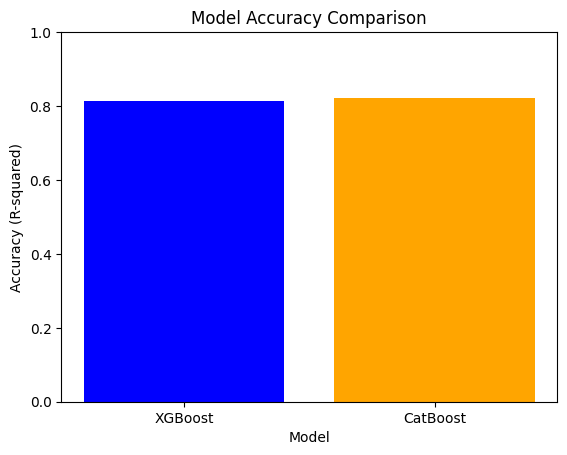

XGBoost Accuracy (R-squared) for 'discounted_price': 0.8128104066965416
CatBoost Accuracy (R-squared) for 'discounted_price': 0.8216178259741382


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
file_path = r"C:\Users\bpava\Downloads\amazon.csv\amazon.csv"
df = pd.read_csv(file_path)

# Extracting relevant columns for analysis
selected_columns = ['discounted_price', 'actual_price']
df = df[selected_columns]

# Handling missing values
df = df.dropna()

# Preprocessing: Convert '₹' to numerical values
df['discounted_price'] = df['discounted_price'].replace('[\₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[\₹,]', '', regex=True).astype(float)

# Subset of data (rows 100 to 600)
df_subset = df.iloc[100:601, :]

# Features and target variable
X = df_subset.drop('actual_price', axis=1)
y = df_subset['actual_price']

# Check data types of features
print("Data types of features:")
print(X.dtypes)

# Check for missing values in features
print("Missing values in features:")
print(X.isnull().sum())

# Check for non-numeric values in features
non_numeric_columns = X.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Check if there are any issues with the types or missing values before standardization
# ...

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
r2_xgb = r2_score(y_test, y_pred_xgb)

# CatBoost model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train_scaled, y_train)
y_pred_catboost = catboost_model.predict(X_test_scaled)
r2_catboost = r2_score(y_test, y_pred_catboost)

# Create a table
data = {'Model': ['XGBoost', 'CatBoost'],
        'Accuracy (R-squared)': [r2_xgb, r2_catboost]}

accuracy_table = pd.DataFrame(data)
print(accuracy_table)

# Bar graph for comparison
models = ['XGBoost', 'CatBoost']
accuracies = [r2_xgb, r2_catboost]

plt.bar(models, accuracies, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy (R-squared)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

# Print accuracy for one column
print(f"XGBoost Accuracy (R-squared) for 'discounted_price': {r2_xgb}")
print(f"CatBoost Accuracy (R-squared) for 'discounted_price': {r2_catboost}")
